# TP: Données contaminées par un robot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eigh
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, LinearRegression, Lasso, LassoCV
from scipy import stats
import statsmodels.api as sm


/home/alba/miniconda3/envs/MY_ENV_P37/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


# Paramètres des plots

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# QUESTION 1

Importer la base de données data_dm3.csv disponible depuis le lien https://bitbucket.org/ portierf/shared_files/downloads/data_dm3.csv. La dernière colonne est la variable à expli quer. Les autres colonnes sont les variables explicatives. Préciser le nombre de variables explicatives et le nombre d’observations.

In [3]:
# Chargement des données dans un dataframe
filename = 'https://bitbucket.org/portierf/shared_files/downloads/data_dm3.csv'
df_org = pd.read_csv(filename, sep=',', header=None)

In [4]:
# Affichage des 5 premières lignes du dataframe construit
df_org.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [5]:
# Nombre de variables explicatives et observations
df = df_org.iloc[:,:-1]
print(f"Nombre de variables explicatives : {len(df.columns[:])}")
print(f"Nombre d'observations : {df[0].count()}")

Nombre de variables explicatives : 210
Nombre d'observations : 442


# QUESTION 2

Les variables explicatives sont-elles centrées ? Normalisées ? Qu’en est-il de la variable à expliquer ?
Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des autres). Commenter les graphiques obtenus.

## Variables explicatives

### Moyennes

Text(0.5, 1.0, 'Distribution des moyennes')

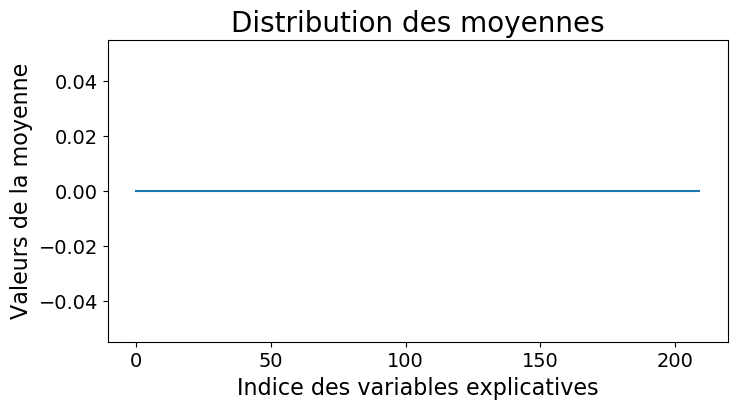

In [6]:
%matplotlib inline
# Graphe représentant les moyennes de toutes les variables explicatives
plt.figure(figsize=(8,4), dpi=100) 
plt.plot(df.mean().round())

plt.ylabel('Valeurs de la moyenne')
plt.xlabel('Indice des variables explicatives')
plt.title("Distribution des moyennes")


On remarque d'après le graphe ci-dessus que les moyennes des variables explicatives sont égales à zéro (à l'arrondi près). On peut donc conclure que les variables sont centrées.

### Variances

Text(0.5, 1.0, 'Distribution des variances')

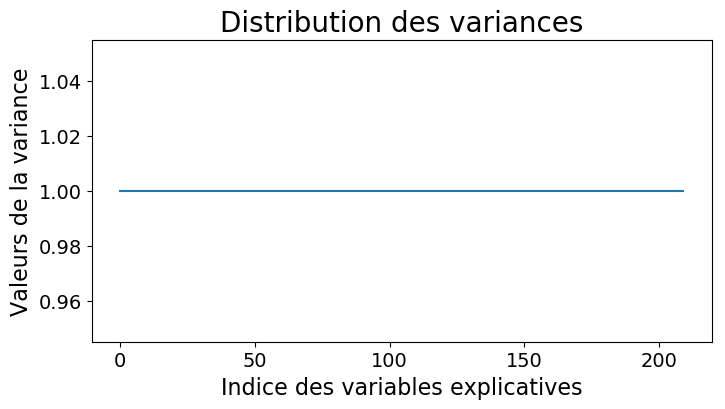

In [7]:
%matplotlib inline
# Graphe représentant les variances de toutes les variables explicatives
plt.figure(figsize=(8,4), dpi=100) 
plt.plot(df.std().round())

plt.ylabel('Valeurs de la variance')
plt.xlabel('Indice des variables explicatives')
plt.title("Distribution des variances")

On remarque d'après le graphe ci-dessus que les variances des variables explicatives sont de l'ordre de 1 (à l'arrondi près). On peut donc conclure que les variables sont normalisées.

## Moyenne et variance de la variable à expliquer

In [8]:
# Variable à expliquer
y = df_org.iloc[:,-1]
print(f"La moyenne des variables à expliquer étant de {y.mean().round()}" \
      + f" et la variance de {y.std().round()}" \
      + " , on en conclut que la variable à expliquer n'est ni centrée ni réduite.")


La moyenne des variables à expliquer étant de 152.0 et la variance de 77.0 , on en conclut que la variable à expliquer n'est ni centrée ni réduite.


## Scatter plot de 4 covariables prises au hasard et de la variable à expliquer

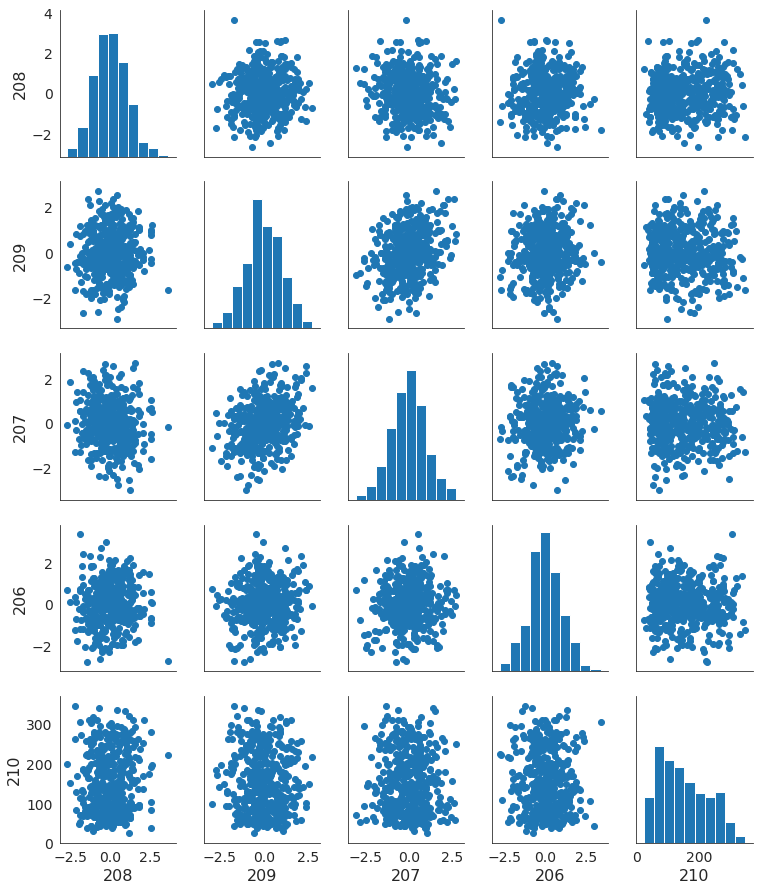

In [9]:
sns.set_style("white")

g = sns.PairGrid(df_org.filter(items=[208, 209, 207, 206, 210]))

g.map(plt.scatter, color='white')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.subplots_adjust(left=0.08, right=0.85)

On constate que les variables choisies ont des distributions gaussiennes. On ne remarque aucune relation particulière entre elles (il n'y a pas de rélle corrélation). La dernière variable (variable à expliquer) n'a en revanche pas de distribution gaussienne.

# QUESTION 3

Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle X train ,
un pour tester le modèle X test . On mettra 20% de la base dans l’échantillon ’test’. Donner les tailles
de chacun des 2 échantillons. On notera que le nouvel échantillon de covariables X train n’est pas
normalizé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régression.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

In [11]:
print(f"L'échantillon X_train est de taille : {X_train.shape[0]} x {X_train.shape[1]}")
print(f"L'échantillon X_test est de taille : {X_test.shape[0]} x {X_test.shape[1]}")
print(f"L'échantillon y_train est de taille : {y_train.shape[0]} x 1")
print(f"L'échantillon y_test est de taille : {y_test.shape[0]} x 1")

L'échantillon X_train est de taille : 353 x 210
L'échantillon X_test est de taille : 89 x 210
L'échantillon y_train est de taille : 353 x 1
L'échantillon y_test est de taille : 89 x 1


# QUESTION 4

Donner la matrice de covariance calculée sur X train . Tracer le graphe de la décroissance des valeurs
propres de la matrice de corvariance. Expliquer pourquoi il est légitime de ne garder que les premières
variables de l’ACP. On gardera 60 variables dans la suite.

## Matrice de covariance

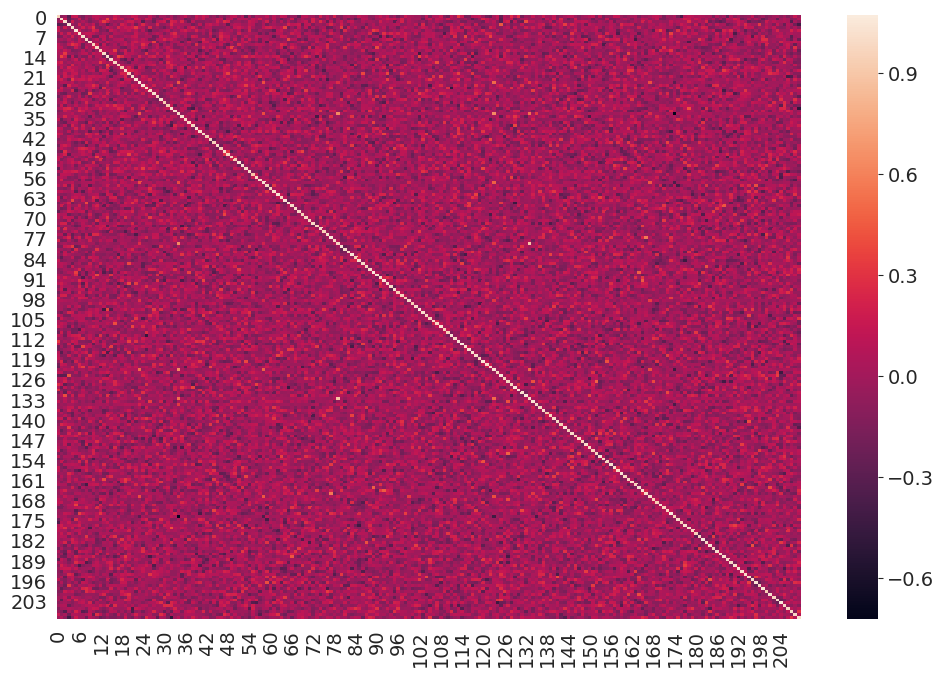

In [12]:
# Matrice de covariance
X_train_cov = X_train.cov()

%matplotlib inline
# Graphe illustrant l'allure de la matrice des covariance
plt.figure(figsize=(12,8), dpi=100)
sns.heatmap(X_train_cov)
plt.show()

## Analyse spectrale de la matrice des covariance

In [13]:
# Calcul des valeurs propres de la matrice de covariance
Dint, Uint = eigh(X_train_cov)
idx = Dint.argsort()[::-1]
D = Dint[idx]
U = Uint[:, idx]


Text(0.5, 1.0, 'Décroissance des valeurs propres')

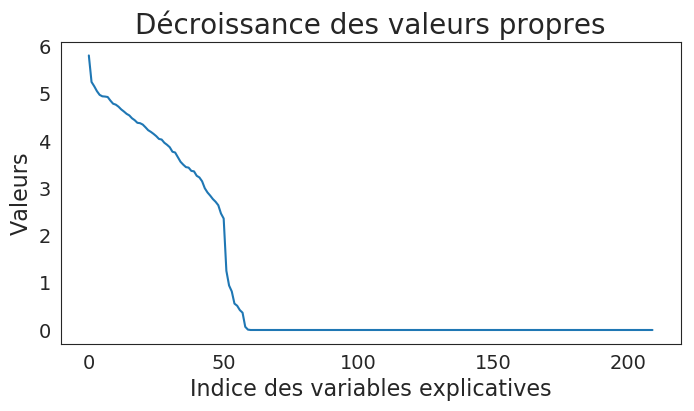

In [14]:
%matplotlib inline
# Graphe représentant la décroissances des valeurs propres de la matrice de covariance
plt.figure(figsize=(8,4), dpi=100) 
plt.plot(D)

plt.ylabel('Valeurs')
plt.xlabel('Indice des variables explicatives')
plt.title("Décroissance des valeurs propres")

À partir de la variable explicative d'index égal à 60, les valeur propres sont nulles. Ceci veut dire que les variables explicatives sont des combinaisons linéaires des autres. Par conséquent, ces dernières n'apportent pas d'information supplémentaire pour construire un modèle linéaire à partir de toutes les variables explicatives. Il est donc légitime de ne garder que les 60 premières variables pour l'ACP.

# QUESTION 5

Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui
consiste à appliquer OLS avec Y et X train V p1:60q , où V p1:60q contient les vecteurs propres (associés
aux 60 plus grandes valeurs propres) de la matrice de covariance. Faire une régression linéaire (avec
intercept), puis tracer les valeurs des coefficients (hors intercept). Sur un autre graphique, faire de
même avec la méthode des moindres carrés classique.

## Fonctions utiles pour la suite

In [15]:
def calc_reg_model_coefficients(X_train, y_train, model):
    '''calcule les coefficients de régression du modèle linéaire'''    
    model.fit(X_train, y_train)
    theta0_skl = model.intercept_
    theta_skl = model.coef_
    return theta0_skl, theta_skl

def calc_train_error(X_train, y_train, model):
    ''' calcule le risque de prédiction sur l'échantillon train'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    ''' calcule le risque de prédiction sur l'échantillon test'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

def calc_error_metrics(X_train, y_train, X_test, y_test, model):
    '''fitte le modèle et donne les risques de prédiction sur les échantillons train et test'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

def calc_R2score(X_train, y_train, X_test, y_test, model):
    '''calcule le coefficient de détermination'''
    model.fit(X_train, y_train)
    R2_score = r2_score(y_test, model.predict(X_test), multioutput='variance_weighted')    
    return R2_score

def calc_residual(X_train, y_train, X_test, y_test, model):
    '''calcule les résidus de la prédiction'''
    model.fit(X_train, y_train)
    return model.predict(X_test) - y_test

## "PCA before OLS"

Ayant analysé les valeurs propres de la matrice de covariance, on a vu qu'il était légitime de ne garder que les 60 premières variables.

In [16]:
# APC (ou PCA en anglais): on choisit les variables qui ne dépendent
# pas les unes des autres et de variance maximale
n = 60
X_train_pca = X_train @ U[:,:n]

# Affichage des 5 premières lignes du dataframe construit
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
438,-1.495035,1.348194,1.640310,-1.783307,-3.499290,-3.758083,-0.278532,3.384614,1.475434,-1.861051,...,1.334723,0.706755,-2.197976,0.695078,0.169764,-0.196092,-1.587226,-0.742565,0.551201,-0.013978
232,1.452014,-2.467190,3.056557,0.211889,1.235818,-1.999949,-0.063333,-1.885742,-3.817781,-1.457328,...,-0.407812,-0.996363,-1.863469,0.151513,-0.158861,-0.158564,-0.234558,-0.254326,0.094982,-0.036707
80,1.228351,0.548785,1.563297,5.398798,2.589271,0.501201,-0.907027,-0.505940,2.790120,-0.107759,...,1.317656,1.688998,1.230382,0.172141,0.360922,0.011671,0.707742,0.171389,0.027035,-0.062996
46,-2.056829,-0.564772,-0.476706,0.361534,-0.938182,-4.491487,0.420381,-1.393296,1.256789,-0.151933,...,-2.922600,-0.293970,0.120328,-1.081555,0.000113,0.193234,0.901963,-0.331883,-0.050420,-0.036515
381,-3.206134,-2.789999,-1.660437,1.083409,-0.377059,-1.053607,0.565282,-1.791987,1.175213,-2.944612,...,-0.631869,-0.641835,-1.270864,0.834882,-0.205520,-0.475092,0.890678,-0.130635,0.167116,0.018121


(0, 59)

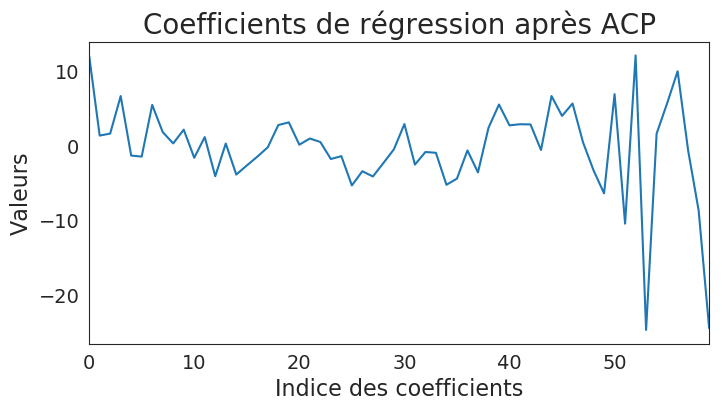

In [57]:
# Régression linéaire avec scikit-learn
theta0_pca_skl = calc_reg_model_coefficients(X_train_pca, y_train, LinearRegression(fit_intercept = True))[0]
theta_pca_skl = calc_reg_model_coefficients(X_train_pca, y_train, LinearRegression(fit_intercept = True))[1]

%matplotlib inline
# Graphe représentant les coefficients de régression linéaire après application de APC
plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.plot(theta_pca_skl)

plt.ylabel('Valeurs')
plt.xlabel('Indice des coefficients')
plt.title("Coefficients de régression après ACP")
plt.xlim([0, 59])


On remarque que les coefficients de régression ne varient pas énormément pour les 50 premières valeurs.
Au délà la variation des coefficients est plus significative.

## OLS classique

(0, 209)

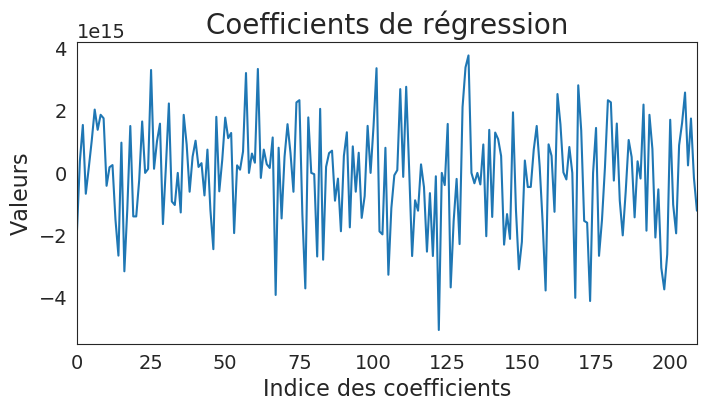

In [18]:
# Régression linéaire avec scikit-learn
theta0_skl = calc_reg_model_coefficients(X_train, y_train, LinearRegression(fit_intercept = True))[0]
theta_skl = calc_reg_model_coefficients(X_train, y_train, LinearRegression(fit_intercept = True))[1]

%matplotlib inline
# Graphe représentant les variances de toutes les variables explicatives
plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.plot(theta_skl)

plt.ylabel('Valeurs')
plt.xlabel('Indice des coefficients')
plt.title("Coefficients de régression")
plt.xlim([0, 209])

On remarque que les coefficients de régression varient de manière très significative avec des valeurs aberrantes de l'ordre de 1e15.

# QUESTION 6

Donner les valeurs des intercepts pour les 2 régressions précédentes. Donner la valeur moyenne de la variable Y (sur le train set). Les intercepts des 2 questions sont-ils égaux ? Commenter. Centrer et réduire les variables après ACP (de petite dimension). Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y sut le train.

## Intercept des 2 régressions précédentes

In [19]:
# Valeurs des intercepts pour les 2 régressions précédentes et de la moyenne de y_train
print(' | Intercept régression après APC |  Intercept régression classique  |')
print(' ---------------------------------------------------------------------')
print(f" |             {round(theta0_pca_skl,2)}             |             {round(theta0_skl,2)}               |")

 | Intercept régression après APC |  Intercept régression classique  |
 ---------------------------------------------------------------------
 |             150.58             |             150.87               |


On constante que les intercepts des 2 régressions précédentes sont différents car on n'utilise pas le même nombre de variables explicatives.

## Régression avec variable standardisée après APC

In [20]:
# Régression linéaire avec variable standardisée après APC
Xc_train_pca = (X_train_pca - X_train_pca.mean()) / X_train_pca.std()
thetac0_skl = calc_reg_model_coefficients(Xc_train_pca, y_train, LinearRegression(fit_intercept = True))[0]

# Valeurs des intercepts pour les 2 régressions précédentes et de la moyenne de y_train
print(' |  Moyenne y_train  |  Intercept régression après APC (variables standardisées)|')
print(' --------------------------------------------------------------------------------')
print(f" |       {round(y_train.mean(),2)}      |                         {round(thetac0_skl,2)}                           |")



 |  Moyenne y_train  |  Intercept régression après APC (variables standardisées)|
 --------------------------------------------------------------------------------
 |       153.38      |                         153.38                           |


Lorsque la moyenne des variables explicatives est nulle (comme ici où l'on est dans le cas standardisé), le terme d'intercept doit être égal à la moyenne de la variable à expliquer. On retrouve bien ce résultat ici.

# QUESTION 7

Pour les 2 méthodes (OLS et PCA before OLS) : Tracer les résidus de la prédiction sur l’échantillon test. Tracer leur densité (on pourra par exemple utiliser un histogramme). Calculer le coefficient de détermination sur l’échantillon test. Calculer le risque de prédiction sur l’échantillon test.

## Résidus de la 'PCA before OLS'

In [21]:
# Selection des variables explicatives test après pca
X_test_pca = X_test @ U[:,:n]

# Calcul du résidu de la variable à expliquer pour l'échantillon test
residual_pca = calc_residual(X_train_pca, y_train, X_test_pca, y_test, LinearRegression(fit_intercept = True))

# Coefficient de détermination
R2_score_pca = calc_R2score(X_train_pca, y_train, X_test_pca, y_test, LinearRegression(fit_intercept = True))
print(f" Le coefficient de détermination est de {round(R2_score_pca,3)}")

# Risque de prédiction
mse_pca = calc_error_metrics(X_train_pca, y_train, X_test_pca, y_test, LinearRegression(fit_intercept = True))[1]
print(f" Le risque de prédiction est de {round(mse_pca,3)}")


 Le coefficient de détermination est de 0.298
 Le risque de prédiction est de 3738.4


## Tracé des résidus

## Densité des résidus

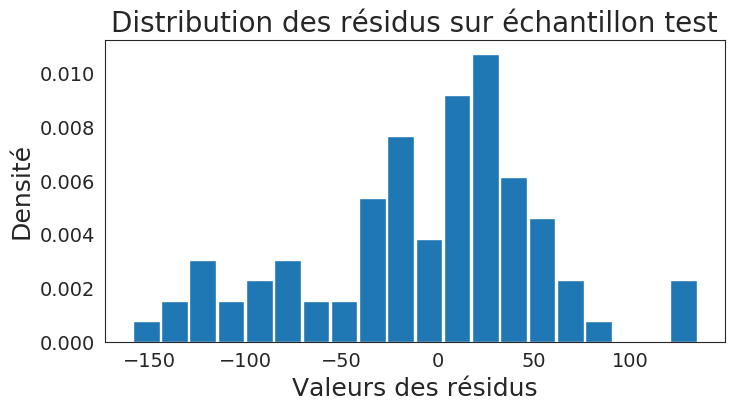

In [22]:
%matplotlib inline

# Histogramme montrant la distribution des résidus sur l'échantillon test
plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.hist(residual_pca, bins=20, density=True, rwidth=0.94)
plt.xlabel("Valeurs des résidus", fontsize=18)
plt.ylabel("Densité", fontsize=18)
plt.title("Distribution des résidus sur échantillon test")
plt.show()

## Résidus OLS

In [23]:
# Calcul du résidu de la variable à expliquer pour l'échantillon test
residual = calc_residual(X_train, y_train, X_test, y_test, LinearRegression(fit_intercept = True))

# Coefficient de détermination
R2_score = calc_R2score(X_train, y_train, X_test, y_test, LinearRegression(fit_intercept = True))

print(f" Le coefficient de détermination est de {round(R2_score,3)}")

# Risque de prédiction
mse = calc_error_metrics(X_train, y_train, X_test, y_test, LinearRegression(fit_intercept = True))[1]
print(f" Le risque de prédiction est de {round(mse,3)}")


 Le coefficient de détermination est de 0.192
 Le risque de prédiction est de 4303.357


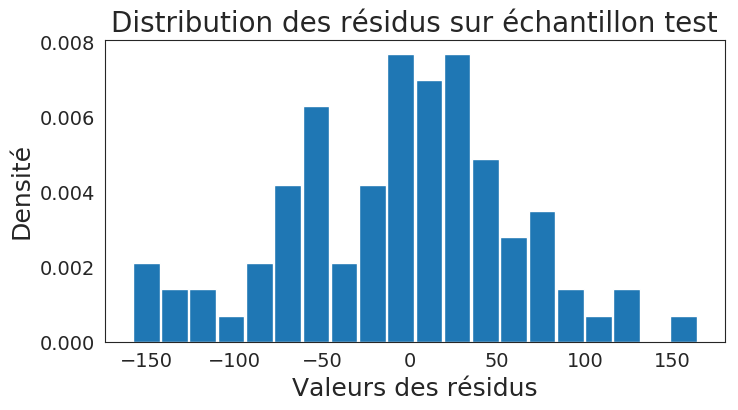

In [24]:
%matplotlib inline

# Histogramme montrant la distribution des résidus sur l'échantillon test
plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.hist(residual, bins=20, density=True, rwidth=0.94)
plt.xlabel("Valeurs des résidus", fontsize=18)
plt.ylabel("Densité", fontsize=18)
plt.title("Distribution des résidus sur échantillon test")
plt.show()

# QUESTION 8
Appliquer la méthode de forward variable sélection. On pourra utiliser la statistique du test de nullité du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arret sur la méthode. C’est à dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables. Afficher l’ordre de séléction des variables.

In [25]:
def forward_variable_selection(X, Y, stop_criterion=False, threshold=0.1):
    """Méthode de forward variable sélection en utilisant la loi de student pour calculer les stat de test
    X: array des covariables de l'échantillon training
    Y: array formée par la variable à expliquer
    """
    n = X.shape[0]
    select_var = []
    select_p_valeur = []
    select_t_stat = []
    X = np.append(np.ones((len(X),1)), X, axis=1)
    i = 0
    test = np.zeros((X.shape[1],X.shape[1]))
    pval = np.zeros((X.shape[1],X.shape[1]))

    while len(select_var) <= X.shape[1]-1:
        p_valeur = []
        t_statistique = []
        residual = []

        for j in range(X.shape[1]):
            if j not in select_var:

                Xj = X[:, j]

                thetaj = 1 / (Xj.T @ Xj) * Xj.T @ Y
                Y_pred = Xj * thetaj
                sigma2j = (Y - Y_pred).T @ (Y - Y_pred) / (n - 1)
                sigma_thetaj = np.sqrt(sigma2j * 1 / (Xj.T @ Xj))
                t_statistiquej = thetaj / sigma_thetaj
                p_valeurj = (1 - stats.t.cdf(abs(t_statistiquej), n - 1)) * 2                            

                p_valeur.append(p_valeurj)
                t_statistique.append(t_statistiquej)                

                residual.append(Y - Y_pred)

            else:
                p_valeur.append(1.1)
                residual.append(0)
                t_statistique.append(0)

        test[:,i] = t_statistique                
        pval[:,i] = p_valeur
        
        imin = np.argmin(p_valeur)
        Y = residual[imin]
        select_var.append(imin)
        select_p_valeur.append(p_valeur[imin])
        select_t_stat.append(t_statistique[imin])

        if stop_criterion == True and p_valeur[imin] > threshold:
            return np.transpose(select_var[1:-1]) - 1, np.transpose(select_p_valeur)[:-1]
            break
                
        i+=1

    return np.transpose(select_var[1:]) - 1, np.transpose(select_p_valeur), test

In [67]:
select_var, select_p_valeur, test = forward_variable_selection(np.array(X_train), np.array(y_train), False)
print(f"Affichage dans l'ordre des variables sélectionnées par l'algorithme de forward variable selection (sans intercept): \
      \n \n {select_var}")

Affichage dans l'ordre des variables sélectionnées par l'algorithme de forward variable selection (sans intercept):       
 
 [ 34  58  79 167 135 123 129 159 208  14 209 147  51 110  17   1   5  77
  40 174  49  52  54 191 112 162  29 113  88  53 202 134  86  99  23 133
  43  90 120 168  69 183 192  39  12  16  46  73  32  76 144  36 188  93
 207 193 190 109  75  94 126  30 194 141 154  11  33 104 178  97 142 187
  38 122 171 151  63  41 128   3 121 101 172  67 181  72 161  48 102 155
 170 152  10  91 182  20 180  13 166 119 103 146  65 184 179 186  31 205
  21 195 100  64   8  24 143 106  25 177 148 140  87  26   0 116 201 117
  71  61   4 108  42 158 199  44  80  68 130  70 164  50   9  27 173   6
 160  28 157  45 153 150 206 189 175 131  56 169  18  22  15  98 165  60
 198  57  19 196 114  47 124 203 125  55  35 139  83  74 115 137 176 197
 149 200 107 127 111  92 163 132 145  37   2  82  59  89  62  96  85   7
 185 156 138  84 118 204  78  95  66  81 105 136]


# QUESTION 9

Critère d’arrêt : On décide d’arrêter lorsque la p-valeur dépasse 0.1. Illustrer la méthode en donnant (i) les 3 graphes des statistiques obtenues lors de la sélection de la 1er, 2eme et 3eme variables (en abscisse : l’index des variables, en ordonné : la valeur des stats) , (ii) le graphe des 50 premières p-valeurs (dont chacune est associée à la variable sélectionnée). Sur ce même graphe, on tracera la ligne horizontale d’ordonnée 0.1. Enfin on donnera la liste des variables sélectionnées.

## Graphes des statistiques obtenues aux 3 premières étapes

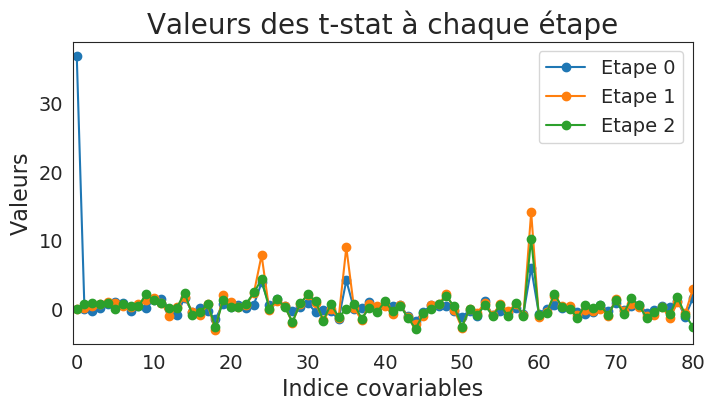

In [27]:
%matplotlib inline

plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
for k in range(3): 
    label_tmp = "Etape %s" % k
    plt.plot(test[:,k], '-o',label = label_tmp)
    plt.axis(xmin = -.5,xmax = 80,ymin = -5)
plt.legend(loc=1)
plt.title("Valeurs des t-stat à chaque étape")
plt.xlabel("Indice covariables")
plt.ylabel("Valeurs")
plt.show()

## Graphes des 50 premières p-valeurs

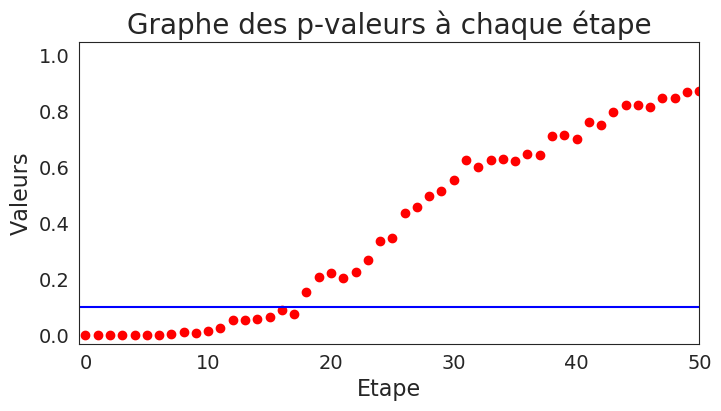

In [28]:
%matplotlib inline

plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.plot(select_p_valeur, 'ro')        
plt.axis(xmin = -.5,xmax = 50,ymin = -.03)
plt.plot([-0.5,50],[.1,.1],color = "blue" )
plt.title("Graphe des p-valeurs à chaque étape")
plt.xlabel("Etape")
plt.ylabel("Valeurs")
plt.show()

## Variables selectionnées avec critère d'arrêt de 0.1 pour la p-valeur

In [29]:
select_var_stop, select_p_valeur_stop = forward_variable_selection(np.array(X_train), np.array(y_train), True)
print(f"Variables sélectionnées par l'algorithme de forward variable selection avec critère d'arrêt: \
      \n \n {select_var_stop}")

Variables sélectionnées par l'algorithme de forward variable selection avec critère d'arrêt:       
 
 [ 34  58  79 167 135 123 129 159 208  14 209 147  51 110  17   1   5]


# QUESTION 10

Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu l’échantillon test et le comparer à ceux de OLS et PCA before OLS.

In [30]:
X_train_forward = X_train.iloc[:,select_var_stop]
X_test_forward = X_test.iloc[:,select_var_stop]

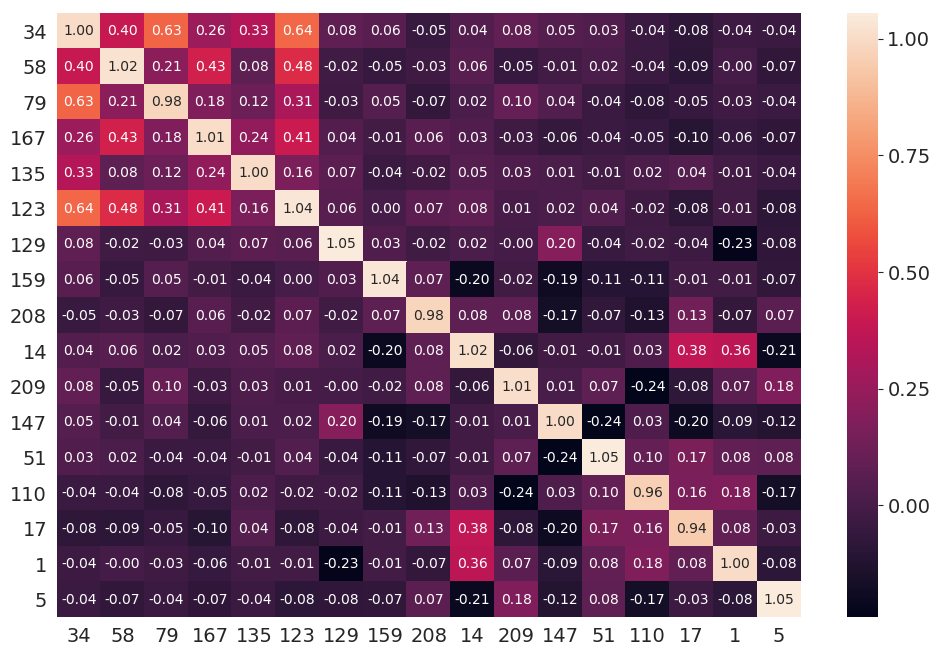

In [31]:
# Matrice de covariance de X_train_forward
%matplotlib inline

plt.figure(figsize=(12,8), dpi=100) #10 unites dans un sens, 4 dans l'autre
sns.heatmap(X_train_forward.cov(), annot=True, fmt=".2f")
plt.show()

## OLS sur variables sélectionnées par forward

In [32]:
# Régression linéaire avec scikit-learn
theta0_forward_skl = calc_reg_model_coefficients(X_train_forward, y_train, LinearRegression(fit_intercept = True))[0]
theta_forward_skl = calc_reg_model_coefficients(X_train_forward, y_train, LinearRegression(fit_intercept = True))[1]

# Calcul du résidu de la variable à expliquer pour l'échantillon test
residual_forward = calc_residual(X_train_forward, y_train, X_test_forward, y_test, LinearRegression(fit_intercept = True))

# Coefficient de détermination
R2_score_forward = calc_R2score(X_train_forward, y_train, X_test_forward, y_test, LinearRegression(fit_intercept = True))
print(f" Le coefficient de détermination est de {round(R2_score_forward,3)}")

# Risque de prédiction
mse_forward = calc_error_metrics(X_train_forward, y_train, X_test_forward, y_test, LinearRegression(fit_intercept = True))[1]
print(f" Le risque de prédiction est de {round(mse_forward,3)}")


 Le coefficient de détermination est de 0.303
 Le risque de prédiction est de 3711.877


## Comparaison avec les autres régressions

In [33]:
# Coefficients de détermination pour les régressions réalisées
print(' |  R2score PCA before OLS  |  R2score OLS  |  R2score forward  |')
print(' -------------------------------------------------------------')
print(f" |            {round(R2_score_pca,3)}         |      {round(R2_score,3)}    |       {round(R2_score_forward,3)}       |")

 |  R2score PCA before OLS  |  R2score OLS  |  R2score forward  |
 -------------------------------------------------------------
 |            0.298         |      0.192    |       0.303       |


In [34]:
# Valeurs des risques de prédiction pour les régressions réalisées
print(' |  Risque PCA before OLS  |  Risque OLS  |  Risque forward  |')
print(' -------------------------------------------------------------')
print(f" |           {round(mse_pca,3)}        |   {round(mse,3)}   |     {round(mse_forward,3)}     |")

 |  Risque PCA before OLS  |  Risque OLS  |  Risque forward  |
 -------------------------------------------------------------
 |           3738.4        |   4303.357   |     3711.877     |


# QUESTION 11

Afin de préparer la validation croisée, séparer l’échantillon train en 4 parties (appelées ”folds”) de façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [35]:
# Séparation de l'échantillon train en 4 parties
K = 4
kf = KFold(n_splits=K, shuffle=True, random_state=1)
data = X_train
target = y_train
i = 1

dict_index_folds = {}

for train_index, fold_index in kf.split(data, target):        
    dict_index_folds[f'Fold {i}'] = np.asarray(X_train.iloc[fold_index].index)
    
    # split des données
    X_train_cv, X_fold_cv = data.iloc[train_index], data.iloc[fold_index]
    y_train_cv, y_fold_cv = target.iloc[train_index], target.iloc[fold_index]
    i += 1

# Affichage du dictionnaire contenant les indices des échantillons contenus dans chaque fold    
dict_index_folds

{'Fold 1': array([381, 224,  85, 233, 260, 185, 139,  95,  92, 179,  91, 120, 337,
        374, 131, 201,  51, 112,   9, 287,  16,   0,  70, 150, 342, 163,
        412, 415, 354, 355, 245, 361, 418, 250, 113, 378, 388, 382, 350,
         28,  55, 341, 362, 309, 432,  21, 248, 137, 217, 345, 181, 379,
        358, 103, 220,  94, 193, 202,  96, 301,  36,  75, 149,   2, 151,
        190, 366, 288, 136, 166, 428, 155, 367, 336, 308,  43, 280,   3,
        387, 410, 316,   1, 241, 413, 178, 335,  72, 396,  37]),
 'Fold 2': array([438,  81, 400,  11, 117, 218, 106, 370,  23, 327,  13, 326, 271,
        340, 191, 320, 332, 328, 414, 403, 339, 330, 125,  12, 187, 325,
         88, 111, 426, 261, 167, 223,  42, 434, 323, 100, 227, 135, 300,
         44, 416,  84,  32,  99,  48,  33, 234,  24, 205, 134, 291,  97,
        278, 118, 176, 406, 140, 423, 269, 240,  77, 263,  52, 262, 417,
         74, 279, 126, 282,  64,  15, 297, 371,  26, 404, 430, 115, 209,
        141,  86, 252, 395, 402, 357, 2

# QUESTION 12
Appliquer la méthode de la régression ridge. Pour le choix du paramètre de régularisation, on fera une validation croisée sur les ”folds” définies lors de la question précédente. A tour de rôle chacune des ”folds” servira pour calculer le risque de prédiction alors que les autres seront utilisées pour estimer le modèle. On moyennera ensuite les 4 risques de prédictions. On donnera la courbe du risque de validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir l’espace de définition pour le graphe). Donner le paramètre de régularisation optimal et la valeur du risque sur le test.

## Validation croisée

In [36]:
alphas = [0.0001,0.0003,0.0006,
          0.001,0.003,0.006,
          0.01,0.03,0.06,
          0.1,0.3,0.6,
          1,3,6,
          10,30,60,
          100,300,600,
          1000,3000,6000]

mean_train_errors = []
mean_fold_errors = []
for alpha in alphas:
    train_errors = []
    fold_errors = []
    for train_index, fold_index in kf.split(data, target):
        
        # split des données
        X_train_cv, X_fold_cv = data.iloc[train_index], data.iloc[fold_index]
        y_train_cv, y_fold_cv = target.iloc[train_index], target.iloc[fold_index]

        # modèle
        ridge = Ridge(alpha=alpha, fit_intercept=True)
        
        #calcul des erreurs
        train_error_cv, fold_error_cv = calc_error_metrics(X_train_cv, y_train_cv, X_fold_cv, y_fold_cv, ridge)
        
        # append to appropriate list
        train_errors.append(train_error_cv)
        fold_errors.append(fold_error_cv)
    
    # generate report
    print('alpha: {:6} | mean(train_error_cv): {:7} | mean(fold_error_cv): {}'.
          format(alpha,
                 round(np.mean(train_errors),3),
                 round(np.mean(fold_errors),3)))
    
    mean_train_errors.append(round(np.mean(train_errors),3))
    mean_fold_errors.append(round(np.mean(fold_errors),3))
    

alpha: 0.0001 | mean(train_error_cv): 2231.162 | mean(fold_error_cv): 3592.349
alpha: 0.0003 | mean(train_error_cv): 2231.162 | mean(fold_error_cv): 3592.342
alpha: 0.0006 | mean(train_error_cv): 2231.162 | mean(fold_error_cv): 3592.33
alpha:  0.001 | mean(train_error_cv): 2231.162 | mean(fold_error_cv): 3592.316
alpha:  0.003 | mean(train_error_cv): 2231.162 | mean(fold_error_cv): 3592.241
alpha:  0.006 | mean(train_error_cv): 2231.162 | mean(fold_error_cv): 3592.13
alpha:   0.01 | mean(train_error_cv): 2231.162 | mean(fold_error_cv): 3591.983
alpha:   0.03 | mean(train_error_cv): 2231.165 | mean(fold_error_cv): 3591.256
alpha:   0.06 | mean(train_error_cv): 2231.172 | mean(fold_error_cv): 3590.195
alpha:    0.1 | mean(train_error_cv): 2231.187 | mean(fold_error_cv): 3588.834
alpha:    0.3 | mean(train_error_cv): 2231.348 | mean(fold_error_cv): 3582.799
alpha:    0.6 | mean(train_error_cv): 2231.74 | mean(fold_error_cv): 3575.549
alpha:      1 | mean(train_error_cv): 2232.366 | mean(f

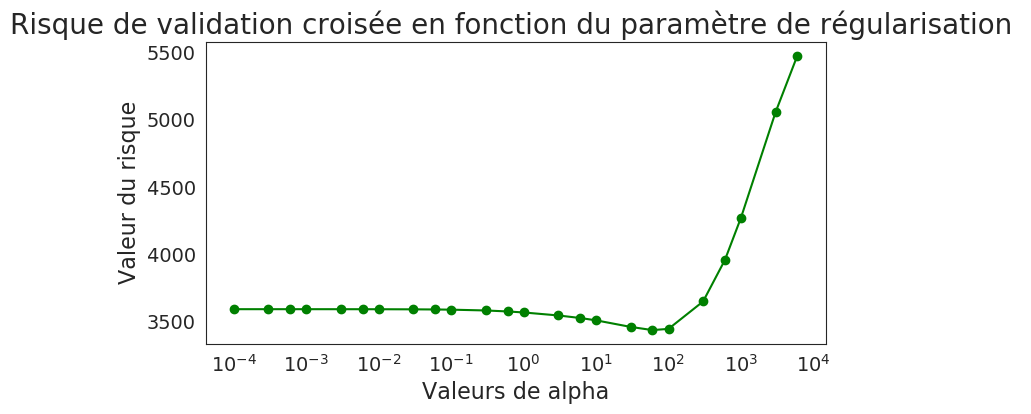

In [61]:
%matplotlib inline

plt.figure(figsize=(8,4), dpi=100) #10 unites dans un sens, 4 dans l'autre
plt.plot(alphas, mean_fold_errors, '-og', label = 'Validation')        
plt.title("Risque de validation croisée en fonction du paramètre de régularisation ")
plt.xlabel("Valeurs de alpha")
plt.ylabel("Valeur du risque")
plt.xscale('log')
plt.show()

In [38]:
# Paramètre optimal de régularisation
alpha_ridge = alphas[np.argmin(mean_fold_errors)]
print('Le paramètre de régularisation optimal est : {}'.format(alpha_ridge))
print('La valeur du risque associée à ce paramètre de régularisation est : {}'.format(np.min(mean_fold_errors)))

Le paramètre de régularisation optimal est : 60
La valeur du risque associée à ce paramètre de régularisation est : 3436.98


## Comparaison avec les autres modèles

In [39]:
# Coefficient de détermination
R2_score_ridge = calc_R2score(X_train, y_train, X_test, y_test, Ridge(alpha=alphas[np.argmin(mean_fold_errors)], fit_intercept=True))
print(f" Le coefficient de détermination est de {round(R2_score_ridge,3)}")

# Risque de prédiction
mse_ridge = calc_error_metrics(X_train, y_train, X_test, y_test, Ridge(alpha=alphas[np.argmin(mean_fold_errors)], fit_intercept=True))[1]
print(f" Le risque de prédiction est de {round(mse_ridge,3)}")


 Le coefficient de détermination est de 0.292
 Le risque de prédiction est de 3774.163


In [40]:
# Coefficients de détermination pour les régressions réalisées
print(' |  R2score PCA before OLS  |  R2score OLS  |  R2score forward  |  R2score ridge  |')
print(' ----------------------------------------------------------------------------------')
print(f" |            {round(R2_score_pca,3)}         |      {round(R2_score,3)}    |       {round(R2_score_forward,3)}       |      {round(R2_score_ridge,3)}      |")

 |  R2score PCA before OLS  |  R2score OLS  |  R2score forward  |  R2score ridge  |
 ----------------------------------------------------------------------------------
 |            0.298         |      0.192    |       0.303       |      0.292      |


In [41]:
# Valeurs des risques de prédiction pour les régressions réalisées
print(' |  Risque PCA before OLS  |  Risque OLS  |  Risque forward  |  Risque ridge  |')
print(' ------------------------------------------------------------------------------')
print(f" |           {round(mse_pca,3)}        |   {round(mse,3)}   |     {round(mse_forward,3)}     |     {round(mse_ridge,3)}   |")

 |  Risque PCA before OLS  |  Risque OLS  |  Risque forward  |  Risque ridge  |
 ------------------------------------------------------------------------------
 |           3738.4        |   4303.357   |     3711.877     |     3774.163   |


# QUESTION 13

A l’aide de la fonction lassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner le risque de prédiction associé.

## Lasso CV

In [62]:
# Modèle LassoCV de sklearn
model_lasso = LassoCV().fit(X_train,y_train)

# Paramètre optimal de régularisation
alpha_lasso = model_lasso.alpha_
print(f"Le paramètre optimal de régularisation pour le Lasso est : {round(alpha_lasso,3)}")

# Risque de prédiction
mse_lasso = calc_error_metrics(X_train, y_train, X_test, y_test, LassoCV().fit(X_train,y_train))[1]
print(f"Le risque de prédiction est de {round(mse_lasso,3)}")

# Coefficient de détermination
R2_score_lasso = calc_R2score(X_train, y_train, X_test, y_test, LassoCV().fit(X_train,y_train))
print(f"Le coefficient de détermination est de {round(R2_score_lasso,3)}")


Le paramètre optimal de régularisation pour le Lasso est : 6.723
Le risque de prédiction est de 3092.656
Le coefficient de détermination est de 0.42


## Comparaison avec les autres modèles

In [43]:
# Coefficients de détermination pour les régressions réalisées
print(' |  R2score PCA |  R2score OLS  |  R2score forward  |  R2score ridge  |  R2score Lasso  |')
print(' ----------------------------------------------------------------------------------------')
print(f" |     {round(R2_score_pca,3)}    |      {round(R2_score,3)}    |       {round(R2_score_forward,3)}       |      {round(R2_score_ridge,3)}      |       {round(R2_score_lasso,3)}      |")

 |  R2score PCA |  R2score OLS  |  R2score forward  |  R2score ridge  |  R2score Lasso  |
 ----------------------------------------------------------------------------------------
 |     0.298    |      0.192    |       0.303       |      0.292      |       0.42      |


In [44]:
# Valeurs des risques de prédiction pour les régressions réalisées
print(' |  Risque PCA |  Risque OLS  |  Risque forward  |  Risque ridge  |  Risque Lasso  |')
print(' -----------------------------------------------------------------------------------')
print(f" |    {round(mse_pca,3)}   |   {round(mse,3)}   |     {round(mse_forward,3)}     |     {round(mse_ridge,3)}   |     {round(mse_lasso,3)}   |")

 |  Risque PCA |  Risque OLS  |  Risque forward  |  Risque ridge  |  Risque Lasso  |
 -----------------------------------------------------------------------------------
 |    3738.4   |   4303.357   |     3711.877     |     3774.163   |     3092.656   |


# QUESTION 14

Donner les variables selectionées par le lasso. Combien y-en a t-il ? Appliquer la méthode OLS aux variables sélectionnées. Cette méthode est appelé Least-square LASSO.

## Coefficient sélectionnés par Lasso

In [45]:
# Coefficients provenant du Lasso
coef_lasso = model_lasso.coef_
select_var_lasso = np.asarray(np.nonzero(coef_lasso))[0]

print(f"Il y a {len(select_var_lasso)} variables selectionnées par le Lasso, qui sont: \
      \n \n {select_var_lasso}")

Il y a 10 variables selectionnées par le Lasso, qui sont:       
 
 [ 17  22  58  84 123 129 135 147 167 174]


## OLS appliquée à Lasso

In [46]:
## OLS appliquée à Lasso
X_train_lasso = X_train.iloc[:,select_var_lasso]
X_test_lasso = X_test.iloc[:,select_var_lasso]

# Régression linéaire avec scikit-learn
theta0_LSlasso_skl = calc_reg_model_coefficients(X_train_lasso, y_train, LinearRegression(fit_intercept = True))[0]
theta_LSlasso_skl = calc_reg_model_coefficients(X_train_lasso, y_train, LinearRegression(fit_intercept = True))[1]

# Calcul du résidu de la variable à expliquer pour l'échantillon test
residual_LSlasso = calc_residual(X_train_lasso, y_train, X_test_lasso, y_test, LinearRegression(fit_intercept = True))

# Coefficient de détermination
R2_score_LSlasso = calc_R2score(X_train_lasso, y_train, X_test_lasso, y_test, LinearRegression(fit_intercept = True))
print(f" Le coefficient de détermination est de {round(R2_score_LSlasso,3)}")

# Risque de prédiction
mse_LSlasso = calc_error_metrics(X_train_lasso, y_train, X_test_lasso, y_test, LinearRegression(fit_intercept = True))[1]
print(f" Le risque de prédiction est de {round(mse_LSlasso,3)}")

 Le coefficient de détermination est de 0.383
 Le risque de prédiction est de 3288.511


## Comparaison avec les autres modèles

In [55]:
# Coefficients de détermination pour les régressions réalisées
print(' |  R2score PCA |  R2score OLS  |  R2score forward  |  R2score ridge  |  R2score Lasso  |  R2score LSLasso  |')
print(' ------------------------------------------------------------------------------------------------------------')
print(f" |     {round(R2_score_pca,3)}    |      {round(R2_score,3)}    |       {round(R2_score_forward,3)}       |      {round(R2_score_ridge,3)}      |       {round(R2_score_lasso,3)}      |        {round(R2_score_LSlasso,3)}      |")

 |  R2score PCA |  R2score OLS  |  R2score forward  |  R2score ridge  |  R2score Lasso  |  R2score LSLasso  |
 ------------------------------------------------------------------------------------------------------------
 |     0.298    |      0.192    |       0.303       |      0.292      |       0.42      |        0.383      |


In [48]:
# Valeurs des risques de prédiction pour les régressions réalisées
print(' |  Risque PCA |  Risque OLS  |  Risque forward  |  Risque ridge  |  Risque Lasso  |  Risque LSLasso  |')
print(' ------------------------------------------------------------------------------------------------------')
print(f" |    {round(mse_pca,3)}   |   {round(mse,3)}   |     {round(mse_forward,3)}     |     {round(mse_ridge,3)}   |     {round(mse_lasso,3)}   |      {round(mse_LSlasso,3)}    |")

 |  Risque PCA |  Risque OLS  |  Risque forward  |  Risque ridge  |  Risque Lasso  |  Risque LSLasso  |
 ------------------------------------------------------------------------------------------------------
 |    3738.4   |   4303.357   |     3711.877     |     3774.163   |     3092.656   |      3288.511    |


### Voici l'ordre de performance de toutes les approches du modèle linéaire testées (de la plus performante à la moins performante):
#### Lasso > LS Lasso > Forward > PCA before OLS > Ridge > OLS classique

# QUESTION 15

Cette dernière question est un question d’ouverture vers une approche non-linéaire. En utilisant les variables séléctionées par le LASSO (Q13) ou par la méthode forward (Q9), mettre au point une méthode de regression non-linéaire. On apprendra les différents paramètres par validation croisée et l’on donnera la valeur du risque de prédiction calculé sur l’échantillon test. Des performances moindres par rapport à OLS peuvent se produire. Commenter.

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

/home/alba/miniconda3/envs/MY_ENV_P37/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [50]:
from sklearn.model_selection import cross_val_score
scores = -cross_val_score(my_pipeline, X_train_forward, y_train, scoring='mean_squared_error')
print(scores)

/home/alba/miniconda3/envs/MY_ENV_P37/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alba/miniconda3/envs/MY_ENV_P37/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/alba/miniconda3/envs/MY_ENV_P37/lib/python3.7/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[4152.27440678 3223.24694915 3689.20034188]


In [51]:
scores

array([4152.27440678, 3223.24694915, 3689.20034188])

In [52]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
438,0.872196,0.975497,0.819331,-0.975557,-0.968388,1.029983,-0.079420,-0.130714,0.201144,-2.390860,...,-1.709679,-0.327924,0.350886,-0.305686,-1.292688,0.124676,1.465920,0.663206,1.278693,0.419890
232,2.159913,0.196423,-0.317763,-0.897468,0.911064,-1.168164,-0.132524,-0.428442,1.114531,-0.896343,...,-0.250236,-1.684559,0.991741,-0.588607,-1.578360,-0.086363,-1.962170,-0.614913,0.790819,-0.554754
80,-1.433086,-1.059063,0.482165,0.690524,0.715360,-0.908439,1.798442,0.613454,0.413338,-0.574897,...,1.976512,0.317224,0.240203,0.831653,1.015808,-0.173611,0.034968,-0.351825,-1.094073,-0.455718
46,-0.227555,1.812300,-1.385836,0.056947,-0.757521,-0.570841,1.129164,0.381618,0.400466,-1.454237,...,0.439450,-1.453755,-2.120632,-2.140869,1.051584,0.021901,0.302564,0.624374,-0.445128,0.820054
381,-2.105265,0.116456,0.614210,-0.492614,-1.622814,0.935128,-1.261347,-1.743394,-0.569904,-0.101352,...,2.405146,0.539839,0.626882,0.938764,-2.212990,1.048612,0.808308,0.582236,-0.460190,-0.084055
224,0.489738,2.305329,2.311989,-1.380616,-0.024837,-0.918113,0.349054,0.073865,1.527136,0.164403,...,1.220787,0.550704,1.797160,-0.353800,0.942836,1.041959,0.225208,-0.569185,-0.726542,-0.099298
85,-0.527501,0.254828,-0.625339,-0.570039,0.423738,-0.175293,-0.788308,-0.203856,-0.388997,1.334548,...,1.903272,0.958549,-0.286939,0.068878,-1.500781,-0.000025,0.131438,-0.142669,0.703624,1.932504
338,0.079725,0.165773,-0.480240,-0.440170,-0.354866,0.543639,0.816800,0.146115,-0.292813,0.279513,...,0.542722,1.289819,0.997257,-0.248737,-0.022131,1.199318,0.088043,0.334551,-0.328913,1.321126
81,0.706407,-0.075426,-0.305694,0.110980,0.483790,0.341849,-0.767029,-0.162802,0.854857,-1.711386,...,0.525449,0.792301,1.089570,2.130778,-2.403556,0.777387,-1.600388,0.282094,-0.594482,-0.124199
400,0.072869,-0.667951,1.641949,-0.323990,-2.478405,0.898458,-1.086401,0.006896,-0.491649,-1.952102,...,-0.993024,0.686525,0.051697,1.953611,-0.087063,0.271383,0.782759,-0.423153,0.671237,-1.184358
